In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from math import factorial

### 1) Simulación recurrencia n perros

1. Funciones auxiliares

In [2]:
#plotea P_t(m) en 3d
def plots(n_fleas,n_dogs,n_steps,Z,flag = True):
    
    y = np.linspace(0,n_steps,n_steps+1)
    x = np.linspace(0,n_fleas, n_fleas+1)
    X, Y = np.meshgrid(x, y)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(Y,X, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_ylabel('Numero de pulgas')
    ax.set_xlabel('Numero de pasos')
    ax.legend()
    plt.savefig(str(n_fleas)+' '+str(n_dogs)+' '+str(n_steps)+'surface.png')
    if(flag):
        ax.set_ylim(0,2*n_fleas/n_dogs)

    plt.show()
    
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111, projection='3d')
    ax2.plot_wireframe(Y,X, Z, rstride=10, cstride=10)
    ax2.set_ylabel('Numero de pulgas')
    ax2.set_xlabel('Numero de pasos')
    ax2.legend()
    plt.savefig(str(n_fleas)+' '+str(n_dogs)+' '+str(n_steps)+'lines.png')
    if(flag):
        ax2.set_ylim(0,2*n_fleas/n_dogs)
    plt.show()
    
    im = plt.imshow(Z, cmap='hot', aspect='auto')
    plt.colorbar(im, orientation='vertical')
    plt.xlim(0,2*n_fleas/n_dogs)
    plt.savefig(str(n_fleas)+' '+str(n_dogs)+' '+str(n_steps)+'colorbar.png')
    plt.show()
    
def binomial(lst,n_dogs,n_fleas):
    probabilities = []
    for i in lst:
        a = factorial(n_fleas) // factorial(i) // factorial(n_fleas - i)
        a = a/(n_dogs**n_fleas)*(n_dogs-1)**(n_fleas-i)
        probabilities.append(a)
    return probabilities


def plot_recurrence(P_vector_last,n_dogs,n_fleas,n_steps,x_lim0,x_lim1,flag = False):
    fig,ax = plt.subplots()
    x = np.linspace(0,n_fleas,n_fleas+1)
    ax.plot(x,P_vector_last,'bo',label='Recurrence')
    ax.plot(x,binomial(x,n_dogs,n_fleas),'ro',label = 'Binomial',ms=3)
    ax.set_title("Función masica de probabilidad")
    ax.set_ylabel('Probabilidad')
    ax.set_xlabel('Numero de pulgas')
    ax.set_xlim(x_lim0,x_lim1)
    ax.legend()
    if(flag):
        fig,axs = plt.subplots(1,2)
        ax1,ax2 = axs[0],axs[1]
        ax1.plot(x,P_vector[-1],'bo',label='Recurrence')
        ax1.set_title("Función masica de probabilidad")
        ax1.set_ylabel('Probabilidad')
        ax1.set_xlabel('Numero de pulgas')
        ax1.legend()
        ax2.plot(x,binomial(x,n_dogs,n_fleas),'ro',label = 'Binomial')
        ax2.set_title("Función masica de probabilidad")
        ax2.set_ylabel('Probabilidad')
        ax2.set_xlabel('Numero de pulgas')
        ax2.set_xlim(x_lim0,x_lim1)
        ax2.legend()
    #plt.savefig(str(n_fleas)+' '+str(n_dogs)+' '+str(n_steps)+'recurrencia.png')

### Recurrencia para n perros y N pulgas:
### $P_{t+1}(m) = \frac{m+1}{N} P_t(m+1) + \frac{N-(m-1)}{N} \frac{1}{n-1} P_t(m-1) + \frac{N-m}{N} \frac{n-2}{n-1} P_t(m)$

In [10]:
def initialize(n_steps,n_fleas):
    P = np.zeros((n_steps+1,n_fleas+1))
    #A = np.random.randint(1,n_fleas,size = (1,n_fleas+1))
    #P[0] = A/np.sum(A)
    P[0,0] = 1
    return P
    
    
def Recurrence(a,b,c,m,n_fleas,n_dogs):
    d = (m+1)/n_fleas*a+(n_fleas+1-m)/(n_fleas*(n_dogs-1))*b+ (n_dogs-2)*(n_fleas-m)/(n_fleas*(n_dogs-1))*c
    return d
    
def Recurrence_bound(a,b,n_fleas,n_dogs,flag):
    if flag == 0:
        d = a/n_fleas + (n_dogs-2)*(n_fleas)/(n_fleas*(n_dogs-1))*b
    else:
        d = a/(n_fleas*(n_dogs-1))
    return d
    
#Obtiene P_(t+1) dado P_t  
def get_next(P_t,n_fleas,n_dogs):
    
    P_next = np.zeros(n_fleas+1)
    P_next[0] = Recurrence_bound(P_t[1],P_t[0],n_fleas,n_dogs,0)
    for m in range(1,n_fleas):
        P_next[m] = Recurrence(P_t[m+1],P_t[m-1],P_t[m],m,n_fleas,n_dogs)
    P_next[-1] = Recurrence_bound(P_t[n_fleas-1],0,n_fleas,n_dogs,1)
    
    return P_next


def evolve_recurrence(P_vector,n_fleas,n_dogs,t):
    for time in range(t):
        P_vector[time+1][:] = get_next(P_vector[time],n_fleas,n_dogs)


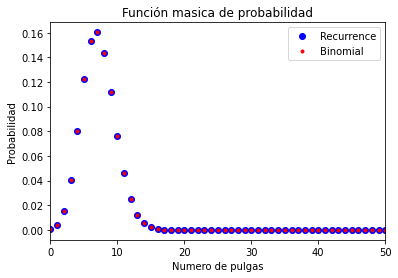

In [11]:
n_dogs = 7
n_fleas = 50
n_steps = 1000
P_vector = initialize(n_steps,n_fleas) # contiene las probabilidades en el tiempo
evolve_recurrence(P_vector,n_fleas,n_dogs,n_steps)
d = len(P_vector)
plot_recurrence((P_vector[-1]+P_vector[d-2])/2,n_dogs,n_fleas,n_steps,0,n_fleas)

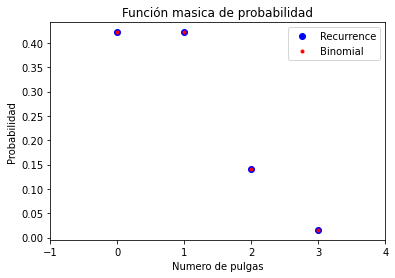

In [16]:
n_dogs = 4
n_fleas = 3
n_steps = 200
P3_vector = initialize(n_steps,n_fleas)
evolve_recurrence(P3_vector,n_fleas,n_dogs,n_steps)
plot_recurrence(P3_vector[-1],n_dogs,n_fleas,n_steps,-1,n_fleas+1)

### Matriz probabilidad de transición

In [18]:
# Probabilidades ij de transicion
def P_ij(i,j,n_fleas,n_dogs):
    p = 0
    if(j == 0):
        if(i == 0):
            p = (n_dogs-2)*(n_fleas)/(n_fleas*(n_dogs-1))
        if(i == 1):
            p = 1/n_fleas
    elif(j == n_fleas):
        if(i == n_fleas-1):
            p = 1/(n_fleas*(n_dogs-1))
    else:
        if(i == (j-1)):
            p = (n_fleas+1-j)/(n_fleas*(n_dogs-1))
        elif(i == j):
            p = (n_dogs-2)*(n_fleas-j)/(n_fleas*(n_dogs-1))
        elif(i == (j+1)):
            p = (j+1)/n_fleas
    return p
#Retorna la matriz de transición
def P_0(n_fleas,n_dogs):
    P0 = np.zeros((n_fleas+1,n_fleas+1))
    for i in range(n_fleas+1):
        for j in range(n_fleas+1):
            P0[i,j] = P_ij(i,j,n_fleas,n_dogs)
    return P0


#retorna la matriz de transición elevada a la steps
# ptrn es cada cuantos pasos imprimir la matriz
def propagate(P,steps,prnt):
    A = np.identity(P.shape[0])
    for step in range(steps):
        A = np.matmul(P,A)
        if(step%prnt == 0):
            print(A)
    return A

In [17]:
n_dogs = 3
n_fleas = 4
n_steps = 100
prnt = 10 #cada cuantos pasos imprimir la matriz
propagate(P_0(n_fleas,n_dogs),n_steps,100)

[[0.5   0.5   0.    0.    0.   ]
 [0.25  0.375 0.375 0.    0.   ]
 [0.    0.5   0.25  0.25  0.   ]
 [0.    0.    0.75  0.125 0.125]
 [0.    0.    0.    1.    0.   ]]


array([[0.19753086, 0.39506173, 0.2962963 , 0.09876543, 0.01234568],
       [0.19753086, 0.39506173, 0.2962963 , 0.09876543, 0.01234568],
       [0.19753086, 0.39506173, 0.2962963 , 0.09876543, 0.01234568],
       [0.19753086, 0.39506173, 0.2962963 , 0.09876543, 0.01234568],
       [0.19753086, 0.39506173, 0.2962963 , 0.09876543, 0.01234568]])

### Main

No handles with labels found to put in legend.


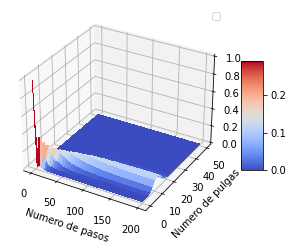

No handles with labels found to put in legend.


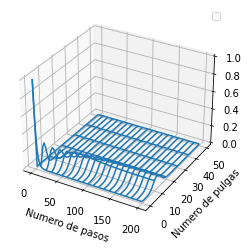

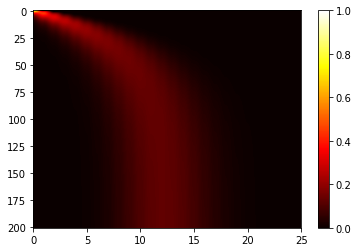

In [34]:
n_dogs = 4
n_fleas = 50
n_steps = 200
P_vector = initialize(n_steps,n_fleas) # contiene las probabilidades en el tiempo
evolve_recurrence(P_vector,n_fleas,n_dogs,n_steps)
plots(n_fleas,n_dogs,n_steps,P_vector,False)

### 2) Simulación con numeros aleatorios

In [35]:
def multinomial(lst,n):
    m = factorial(n)
    for i in lst:
        m *= 1/factorial(i)
    return m

def max_value(n_fleas,n_dogs):
    k = int(n_fleas)//n_dogs
    r = n_fleas-k*n_dogs
    max_v = multinomial([k]*(n_dogs-r)+[k+1]*r,n_fleas)
    if n_fleas != 1:
        max_v = np.log(max_v) 
    return max_v


def get_current_Entropy(d_state,n_fleas):
    return np.log(multinomial(d_state,n_fleas))

In [36]:
#Hay dos arreglos:
#f_state contiene en la casilla i el perro actual en el que se encuentra la pulga i (enumerando las pulgas de 0 a nfleas-1)
#d_state contiene en la casilla i el numero de pulgas actuales que se encuentran en el (enumerando los perros de 0 a ndogs-1)

#se incializan las pulgas toas en un mismo perro
def initialize_state(n_fleas,n_dogs):
    f_state = [0]*n_fleas #casilla i-esima --> pulga_i en perro f_state[i]
    d_state = [0]*n_dogs #casilla i-esima --> num de pulgas en perro i
    d_state[0] = n_fleas
    return f_state, d_state

#elgie uniformemente una pulga
def fRandom(n_fleas):
    n1 = np.random.randint(n_fleas)
    return n1

#elige uniformemente un perro que no tiene a la pulga que saltará
def dRandom(n_dogs,n):
    n1 = np.random.randint(n_dogs-1)
    if(n1 >= n):
        n1 += 1
    return n1

#Actualiza f_state y d_state en un solo salto. Pseudocodigo:
#Elige pulga n1 (se encuentra en perro_n1) --->  elige perro en el que no estuviera la pulga n1 (perro_n2) ---> actualiza
# numero de pulgas en perro_n1 -=1 , numero de pulgas en perro_n2 +=1, pulga n1 ahora está en perro_n2
def update(f_state,d_state,n_fleas,n_dogs):
    n1 = fRandom(n_fleas)
    dog_n1 = f_state[n1]
    dog_n2 = dRandom(n_dogs,dog_n1)
    d_state[dog_n1] -= 1
    d_state[dog_n2] += 1
    f_state[n1] = dog_n2

#actualiza f_state y d_state en steps pasos, y crea un vector Hist cuya entrada i-esima es el numero de pulgas
#que tiene el perro 0 en el paso i-esimo
def evolve(f_state,d_state,n_fleas,n_dogs,steps):
    Entropy =  np.zeros(steps+1)
    Entropy[0] = get_current_Entropy(d_state,n_fleas)
    Hist = [0]*(steps+1)
    Hist[0] = d_state[0]
    for step in range(steps):
        update(f_state,d_state,n_fleas,n_dogs)
        Hist[step+1] = d_state[0]
        Entropy[step+1] = get_current_Entropy(d_state,n_fleas)
    return Hist,Entropy

#corre la simulación steps pasos
def simulate(n_fleas,n_dogs,steps):
    f_state,d_state = initialize_state(n_fleas,n_dogs)
    Hist,Entropy = evolve(f_state,d_state,n_fleas,n_dogs,steps)
    return Hist,Entropy

In [59]:
#plots functions

def plot_hist(Hist,n_fleas,steps,x_lim,flag = True):
    plt.hist(Hist, bins= n_fleas,density = flag,range=(0,x_lim))
    title = "Histograma de pulgas en el perro 0 despues de "+str(steps)+" pasos"
    plt.title(title)
    plt.xlabel('Número de pulgas',size=12)
    plt.ylabel('Probabilidad',size=12)
    plt.savefig(str(n_fleas)+' '+str(n_dogs)+' '+str(steps)+'HIsto.png')
    plt.show()
    
def plot_numf_vs_time(Hist,steps,x_0,x_f):
    plt.plot(Hist,'-o',ms = 0.2)
    plt.title("Numero de Pulgas en el perro 0 con el paso del tiempo\n para "+str(steps)+" pasos")
    plt.ylabel('Número de pulgas')
    plt.xlabel('Pasos en el tiempo')
    plt.xlim(x_0,x_f)
    plt.savefig(str(n_fleas)+' '+str(n_dogs)+' '+str(steps)+'numTime.png')
    plt.show()

def plot_Bzmann_S(Entropy,steps,y_lim0,y_lim1,flag = 0):
    plt.plot(np.linspace(0,steps,steps+1),Entropy)
    plt.title("Entropia de Boltzmann con el paso del tiempo\n para "+str(steps)+" pasos")
    plt.ylabel('Entropia',size=12)
    plt.xlabel('Pasos en el tiempo',size=12)
    plt.ylim(y_lim0,y_lim1)
    if(flag != 0):
        plt.xscale("log")
    plt.savefig(str(n_fleas)+' '+str(n_dogs)+' '+str(steps)+'Entropy.png')
    plt.show()

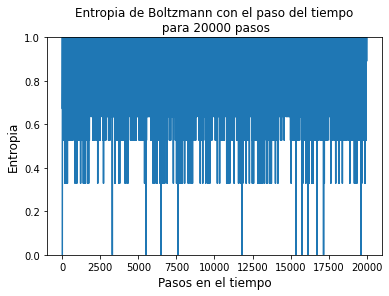

In [61]:
n_fleas = 8
n_dogs = 3
steps = 20000
lim = n_fleas/n_dogs + 2*(n_fleas*(n_dogs-1)/n_dogs)**0.5 # limita el eje y en promedio + 2*varianza , valido para n_fleas > n_dogs
Hist,Entropy = simulate(n_fleas,n_dogs,steps)
mv = max_value(n_fleas,n_dogs)
Entropy_norm = Entropy/mv #Entropia normalizada
plot_Bzmann_S(Entropy_norm,steps,0,1)

Varianza: 2.83118791322653
Valor esperado 3.374999999999999


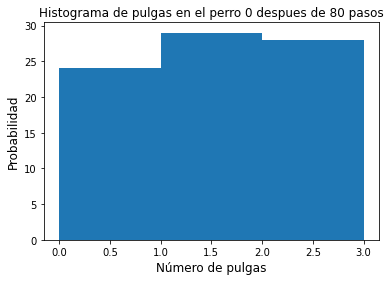

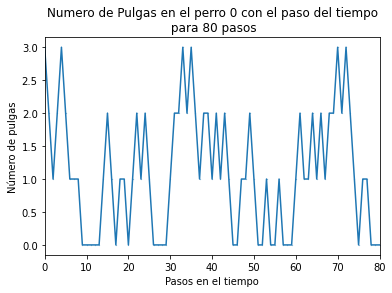

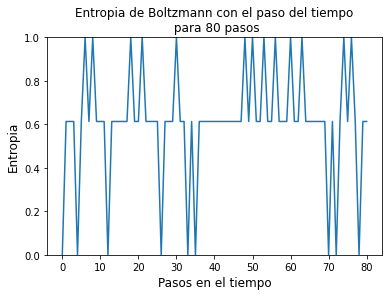

In [51]:
n_fleas = 3
n_dogs = 3
steps = 80
p = (1-(1/n_dogs))**n_fleas
print('Varianza:',((1-p)/(p**2))**0.5)
print('Valor esperado',1/p)
lim = n_fleas/n_dogs + 2*(n_fleas*(n_dogs-1)/n_dogs)**0.5 # limita el eje y en promedio + 2*varianza , valido para n_fleas > n_dogs
Hist,Entropy = simulate(n_fleas,n_dogs,steps)
mv = max_value(n_fleas,n_dogs)
Entropy_norm = Entropy/mv #Entropia normalizada
plot_hist(Hist,n_fleas,steps,n_fleas,False)
#plot_numf_vs_time(Hist,steps,n_fleas)
plot_numf_vs_time(Hist,steps,0,steps)
#plot_Bzmann_S(Entropy,steps,0,mv)
plot_Bzmann_S(Entropy_norm,steps,0,1)
#plot_Bzmann_S(Entropy_norm,steps,0.4,1,1)

### Si se desea correr la simulación para un numero grande de plugas, corra las siguientes casillas:
Esto se debe a que el cálculo de factoriales es computacionalmente complejo, lo cual se requiere en el calculo de la entropia

In [216]:
#plots functions

def plot_hist(Hist,n_fleas,steps):
    plt.hist(Hist, bins= n_fleas,density = True)
    plt.title("Histograma de pulgas en el perro 0 despues de "+str(steps)+" pasos")
    plt.xlabel('Número de pulgas',size=12)
    plt.ylabel('Probabilidad',size=12)
    plt.show()
    
def plot_numf_vs_time(Hist,steps):
    plt.plot(Hist,'-o',ms = 0.2)
    plt.title("Número de Pulgas en el perro 0 con el paso del tiempo\n para "+str(steps)+" pasos")
    plt.ylabel('Número de pulgas',size=12)
    plt.xlabel('Pasos en el tiempo',size=12)
    plt.show()

def plot_Bzmann_S(Entropy,steps,flag = 0):
    plt.plot(np.linspace(0,steps,steps+1),Entropy)
    plt.title("Entropia de Boltzmann con el paso del tiempo\n para "+str(steps)+" pasos")
    plt.ylabel('Entropia',size=12)
    plt.xlabel('Pasos en el tiempo',size=12)
    if(flag != 0):
        plt.xscale("log")
    plt.show()
    
def evolve(f_state,d_state,n_fleas,n_dogs,steps):
    Hist = [0]*(steps+1)
    Hist[0] = d_state[0]
    for step in range(steps):
        update(f_state,d_state,n_fleas,n_dogs)
        Hist[step+1] = d_state[0]
    return Hist

#corre la simulación steps pasos
def simulate(n_fleas,n_dogs,steps):
    f_state,d_state = initialize_state(n_fleas,n_dogs)
    Hist = evolve(f_state,d_state,n_fleas,n_dogs,steps)
    return Hist

In [ ]:
n_fleas = 110
n_dogs = 109
steps = 10000
lim = n_fleas/n_dogs + 2*(n_fleas*(n_dogs-1)/n_dogs)**0.5 # limita el eje y en promedio + 2*varianza , valido para n_fleas > n_dogs
Hist = simulate(n_fleas,n_dogs,steps)
plot_hist(Hist,n_fleas,steps)
plot_numf_vs_time(Hist,steps)
plot_numf_vs_time(Hist,steps)